In [1]:
from google.colab import files
data_to_load = files.upload()

Saving data1.csv to data1.csv


In [2]:
import csv
import pandas as pd
import statistics
import plotly.express as px

df = pd.read_csv("data1.csv")
fig = px.scatter(df , y = "quant_saved" , color = "highschool_completed")
fig.show()


In [3]:
with open("data1.csv" , newline = "") as f :
  reader = csv.reader(f)
  savings = list(reader)

savings.pop(0)
total = len(savings)
total_remainder = 0

for data in savings :
  if int(data[3]) == 1 :
    total_remainder = total_remainder + 1

total_notRemainded = total - total_remainder

import plotly.graph_objects as go

fig = go.Figure(go.Bar(x = ["remainded" , "not remainded"] , y = [total_remainder , total_notRemainded]))
fig.show()

In [4]:
all_savings = []

for data in savings :
  all_savings.append(float(data[0]))

mean = statistics.mean(all_savings)
median = statistics.median(all_savings)
mode = statistics.mode(all_savings)

print(mean , mode , median)

85.32780331328739 0.0 39.2724


In [5]:
remainder_savings = []
non_remainder_saving = []

for data in savings :
  if int(data[3]) == 1 :
    remainder_savings.append(float(data[0]))
  else :
    non_remainder_saving.append(float(data[0]))

mean_1 = statistics.mean(remainder_savings)
median_2 = statistics.median(remainder_savings)
mode_3 = statistics.mode(remainder_savings)

mean = statistics.mean(non_remainder_saving)
median = statistics.median(non_remainder_saving)
mode = statistics.mode(non_remainder_saving)

print(mean_1 , median_2 , mode_3 , mean , median , mode)


78.61157672384391 39.2724 2.284 87.22929365730847 39.2724 0.0


In [6]:
std_all = statistics.stdev(all_savings)
std_r = statistics.stdev(remainder_savings)
std_nr = statistics.stdev(non_remainder_saving)

print(std_all , std_r , std_nr)


196.75453011909315 164.58072141099734 204.91519933877308


In [7]:
import numpy as np

age = []
saving = []

for data in savings :
  if float(data[2]) != 0 :
    age.append(float(data[2]))
    saving.append(float(data[0]))

correlation = np.corrcoef(age , saving)
print(correlation[0 , 1])

nan


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2560: RuntimeWarning:

invalid value encountered in true_divide



In [8]:
import plotly.figure_factory as ff
fig = ff.create_distplot([df["quant_saved"].tolist()], ["Savings"], show_hist=False) 
fig.show()

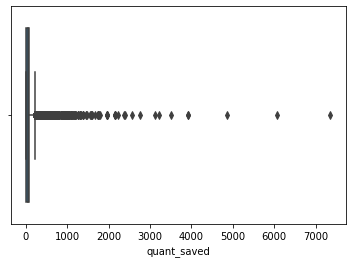

In [9]:
import seaborn as sns

sns.boxplot(data = df , x = df["quant_saved"])

In [10]:
q1 = df["quant_saved"].quantile(0.25)
q3 = df["quant_saved"].quantile(0.75)

iqr = q3 - q1
lower_whisker = q1 - 1.5*iqr
upper_whisker = q3 + 1.5*iqr

print(iqr , lower_whisker , upper_whisker)

new_df = df[df["quant_saved"] < upper_whisker]


84.22999999999999 -124.06099999999998 212.85899999999998


In [11]:
all_savings = new_df["quant_saved"].tolist()

mean = statistics.mean(all_savings)
median = statistics.median(all_savings)
mode = statistics.mode(all_savings)

print(mean , mode , median)


fig = ff.create_distplot([new_df["quant_saved"].tolist()], ["Savings"], show_hist=False) 
fig.show()

46.200519389818794 0.0 36.0475


In [12]:
import random

sampling_mean_list = []
for i in range(1000) :
  temp_list = []
  for j in range(100) :
    temp_list.append(random.choice(all_savings))
  sampling_mean_list.append(statistics.mean(temp_list))

mean_sampling = statistics.mean(sampling_mean_list)

fig = ff.create_distplot([sampling_mean_list], ["Savings (Sampling)"], show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling, mean_sampling], y=[0, 0.1], mode="lines", name="MEAN")) 
fig.show()

In [13]:
print({statistics.mean(all_savings)})
print(mean_sampling)

{46.200519389818794}
46.42048264964669


In [14]:
temp_df = new_df[new_df.age != 0]

age = temp_df["wealthy"].tolist()
saving = temp_df["quant_saved"].tolist()

correlation = np.corrcoef(age , saving)
print(correlation[0 , 1])

AttributeError: ignored

In [15]:
reminded_df = new_df.loc[new_df["highschool_completed"] == 1]
not_reminded_df = new_df.loc[new_df["highschool_completed"] == 0]

print(reminded_df.head())
print(not_reminded_df.head())

   quant_saved  female  highschool_completed  wealthy
1      39.2724       0                     1        1
3      58.9086       1                     1        1
4      78.5448       1                     1        1
5      39.2724       1                     1        1
6      32.7270       1                     1        1
    quant_saved  female  highschool_completed  wealthy
0     13.090800       1                     0        0
9     52.363200       1                     0        0
28    47.178078       0                     0        0
29    98.181000       0                     0        0
38    39.272400       1                     0        0


In [16]:
fig = ff.create_distplot([not_reminded_df["quant_saved"].tolist()], ["Savings (Not Reminded)"], show_hist=False)
fig.show()

In [17]:
not_reminded_savings = not_reminded_df["quant_saved"].tolist()

sampling_mean_list_not_reminded = []
for i in range(1000):
  temp_list = []
  for j in range(100):
    temp_list.append(random.choice(not_reminded_savings))
  sampling_mean_list_not_reminded.append(statistics.mean(temp_list))

mean_sampling_not_reminded = statistics.mean(sampling_mean_list_not_reminded)
stdev_sampling_not_reminded = statistics.stdev(sampling_mean_list_not_reminded)

print(f"Mean of Sampling (Not Reminded) -> {mean_sampling_not_reminded}")
print(f"Standard Deviation of Sampling (Not Reminded) -> {stdev_sampling_not_reminded}")
fig = ff.create_distplot([sampling_mean_list_not_reminded], ["Savings (Sampling)"], show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling, mean_sampling], y=[0, 0.1], mode="lines", name="MEAN"))
fig.show()

Mean of Sampling (Not Reminded) -> 45.56440516060635
Standard Deviation of Sampling (Not Reminded) -> 5.136554646666649


In [18]:
first_std_deviation_start = mean_sampling_not_reminded-stdev_sampling_not_reminded
first_std_deviation_end = mean_sampling_not_reminded+stdev_sampling_not_reminded
print(f"First (start) - {first_std_deviation_start} and First (end) - {first_std_deviation_end}")

second_std_deviation_start = mean_sampling_not_reminded-(2*stdev_sampling_not_reminded)
second_std_deviation_end = mean_sampling_not_reminded+(2*stdev_sampling_not_reminded)
print(f"Second (start) - {second_std_deviation_start} and Second (end) - {second_std_deviation_end}")

third_std_deviation_start = mean_sampling_not_reminded-(3*stdev_sampling_not_reminded)
third_std_deviation_end = mean_sampling_not_reminded+(3*stdev_sampling_not_reminded)
print(f"Third (start) - {third_std_deviation_start} and Third (end) - {third_std_deviation_end}")

First (start) - 40.4278505139397 and First (end) - 50.700959807272994
Second (start) - 35.29129586727305 and Second (end) - 55.83751445393965
Third (start) - 30.1547412206064 and Third (end) - 60.9740691006063


sampling_mean_list_reminded = []
for i in range(1000):
  temp_list = []
  for j in range(100):
    temp_list.append(random.choice(remainder_savings))
  sampling_mean_list_reminded.append(statistics.mean(temp_list))

mean_sampling_reminded = statistics.mean(sampling_mean_list_reminded)
stdev_sampling_reminded = statistics.stdev(sampling_mean_list_reminded)

print(f"Mean of Sampling (Reminded) -> {mean_sampling_reminded}")
print(f"Standard Deviation of Sampling (Reminded) -> {stdev_sampling_reminded}")
fig = ff.create_distplot([sampling_mean_list_reminded], ["Savings (Sampling)"], show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling, mean_sampling], y=[0, 0.1], mode="lines", name="MEAN"))
fig.show()

In [19]:
isit_score = (mean_sampling_reminded - mean_sampling_not_reminded) / stdev_sampling_not_reminded
print(isit_score)

NameError: ignored